<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/13-RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [7]:
# df.profile_report()

In [8]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

In [9]:
#df.describe()

In [10]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 24)
(30000,)


Split my data into training and testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [12]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [14]:
y_predict = rf.predict(X_test)

Check feature importance


In [15]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.12993459928607498, 'PAY_0'),
 (0.05912143278458651, 'PAY_2'),
 (0.054414605259066176, 'ID'),
 (0.05059737199945095, 'BILL_AMT1'),
 (0.047081493811427365, 'LIMIT_BAL'),
 (0.04673483692275354, 'PAY_AMT1'),
 (0.04648452512179922, 'BILL_AMT2'),
 (0.04443415875964076, 'PAY_AMT2'),
 (0.043505076090624865, 'BILL_AMT3'),
 (0.04256463860798416, 'PAY_AMT3'),
 (0.04252438883803284, 'BILL_AMT4'),
 (0.042071436887405986, 'BILL_AMT6'),
 (0.041698904294130264, 'AGE'),
 (0.041437583707416285, 'BILL_AMT5'),
 (0.038933243694576146, 'PAY_AMT4'),
 (0.03890115584650165, 'PAY_3'),
 (0.03883396040308813, 'PAY_AMT6'),
 (0.03666950170200533, 'PAY_AMT5'),
 (0.035890612935517235, 'PAY_4'),
 (0.023604473828435495, 'PAY_5'),
 (0.022854525343125317, 'PAY_6'),
 (0.01519764454355527, 'EDUCATION'),
 (0.008999367687600098, 'MARRIAGE'),
 (0.007510461645201551, 'SEX')]

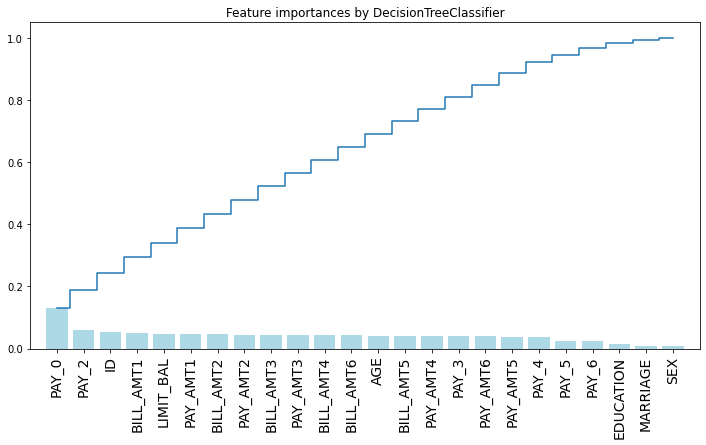

In [16]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [17]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [18]:
X_test.shape

(9000, 24)

In [19]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [20]:
y_probability = rf.predict_proba(X_test)

In [21]:
y_probability.shape

(9000, 2)

In [22]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.3551020408163265


In [23]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.84      0.95      0.89      7040
     default       0.66      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [25]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6684  356]
 [1264  696]]


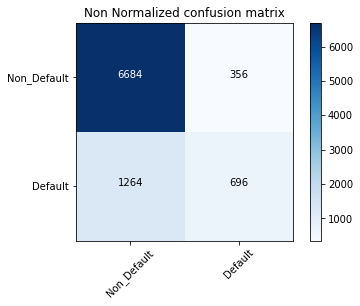

In [28]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')